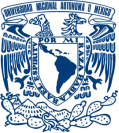
Universidad Nacional Autónoma de México
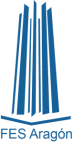

                 Facultad de Estudios Superiores Aragón 

                 Métodos Numéricos

                 Ingeniería Industrial 

                 Integrantes:

                 -Gonzalez Ruiz Yohana Itzel

                 -Luna Perez Carlos Yaret

                 -Martínez Martínez Alejandro

                 -Soto Mateos Juliana Paola

                 -Grupo: 8204 

                 Profesor: Nelly Rigaud Tellez

                 Fecha de entrega: 22/04/2025

                 Método Máximo Elemento Pivote


Si se utiliza el método Gauss o Gauss-Jordan, es habitual hallar errores numéricos si no se selecciona correctamente el pivote.  Para prevenir este inconveniente, se puede emplear la técnica del máximo elemento pivote, en la que se debe identificar el valor más alto (en términos absolutos) en cada columna antes de realizar las operaciones.  Esto incrementa la estabilidad del cálculo y disminuye la posibilidad de hallar errores de redondeo. Este procedimiento se desarrollará de nuevo en Python, demostrando cómo se eligen los pivotes de manera adecuada y su impacto en el resultado final.
Sistema de ecuaciones que se resuelve:

3x - 2y + 5z = 7

x + y - z = 2

2x + 3y + 4z = 3

El sistema está representado en su forma general:
Ax=b
Donde:
“A” es la matriz de coeficientes (3x3)
“b” es el vector de términos independientes (3x1)
Se usa la eliminación gaussiana, un método clásico para convertir la matriz "A” en una forma triangular superior.
Se aplica pivoteo parcial (máximo) para mejorar la estabilidad numérica del algoritmo. 
Esto significa:
En cada paso, se busca el valor absoluto más grande en la columna actual.
Se intercambian filas para que ese valor esté en la posición del pivote (diagonal principal).
Esto evita divisiones por números pequeños y reduce el error numérico.



PROCEDIMIENTO PARA RESOLVER EN PYTHON
1. Definir función pivote_maximo(A, b):
    a. Obtener n = número de filas de la matriz A
    b. Formar la matriz aumentada [A | b]
    c. Para cada columna i desde 0 hasta n-1:
        i. Buscar el índice de la fila con el valor absoluto más grande en la columna i (desde fila i hasta n)
        ii. Intercambiar la fila actual (i) con la fila que tiene el mayor valor (pivoteo máximo)
        iii. Para cada fila j desde i+1 hasta n-1:
            - Calcular el factor = A[j][i] / A[i][i]
            - Restar (factor × fila i) a la fila j para hacer A[j][i] = 0
    d. Crear un vector x de tamaño n con ceros
    e. Realizar sustitución hacia atrás:
        - Para i desde n-1 hasta 0:
            - Calcular x[i] usando:
              x[i] = (A[i][-1] - suma de A[i][k] * x[k] para k = i+1 hasta n-1) / A[i][i]
    f. Devolver el vector solución x
2. En el programa principal:
    a. Definir matriz A y vector b
    b. Llamar a la función pivote_maximo(A, b)
    c. Imprimir la solución x

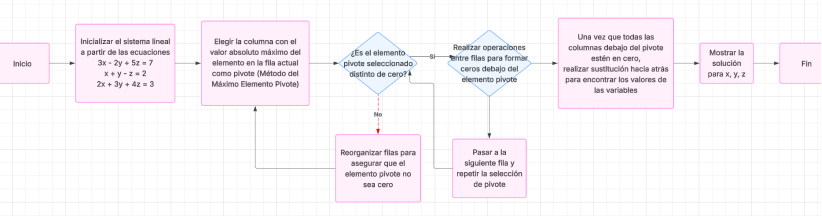

ENLACE A DIAGRAMA EN LUCIDCHART: 

https://lucid.app/lucidchart/c4f2ff85-e927-40bd-9d85-7fb8d6149572/edit?viewport_loc=-1903%2C653%2C4561%2C1973%2C0_0&invitationId=inv_6708a341-5f6d-4a93-a010-a240fcd4d322

CODIGO PYTHON

In [ ]:
import numpy as np

def pivote_maximo(A, b):
    # Número de ecuaciones (tamaño de A, A es una matriz cuadrada de n x n)
    n = len(A)
    
    # Convertir el vector columna 'b' en una matriz de tamaño n x 1
    # Hacemos esto para poder trabajar con una matriz aumentada [A|b]
    A = np.hstack((A, b.reshape(-1, 1)))
    
    # Proceso de eliminación de Gauss con pivoteo máximo
    for i in range(n):
        # Paso 1: Buscar el índice del máximo valor absoluto en la columna 'i' 
        # a partir de la fila i hasta la última fila (submatriz A[i:n, i])
        # np.argmax devuelve el índice dentro de este subvector, por lo que sumamos 'i' 
        # para obtener la posición global dentro de la matriz.
        max_row = np.argmax(np.abs(A[i:n, i])) + i
        
        # Paso 2: Intercambiar la fila actual con la fila que tiene el mayor valor absoluto
        # en la columna 'i'. Esto es crucial para mejorar la estabilidad numérica.
        A[[i, max_row]] = A[[max_row, i]]
        
        # Paso 3: Realizar la eliminación de Gauss para los elementos debajo del pivote (A[i,i])
        for j in range(i+1, n):
            # Calcular el factor de eliminación (coeficiente que multiplicará la fila pivote)
            # para que el elemento en la posición A[j,i] se haga cero.
            factor = A[j, i] / A[i, i]
            
            # Restar la fila 'i' multiplicada por el factor de la fila 'j'.
            # Esto hace que el elemento A[j,i] se convierta en cero y, al mismo tiempo,
            # modifica el resto de los elementos de la fila 'j' para mantener la igualdad.
            A[j, i:] -= factor * A[i, i:]
    
    # Paso 4: Sustitución hacia atrás para obtener la solución del sistema
    # Al final del proceso de eliminación de Gauss, la matriz A estará en forma triangular superior.
    # Esto permite usar sustitución hacia atrás para obtener los valores de x.
    x = np.zeros(n)  # Inicializamos el vector solución 'x' con ceros.
    
    # Comenzamos desde la última fila (hacia atrás) y vamos calculando los valores de x.
    for i in range(n-1, -1, -1):
        # Para la fila 'i', calculamos el valor de x[i] usando la ecuación A[i, i] * x[i] 
        # + A[i, i+1] * x[i+1] + ... = A[i, -1] (última columna, los términos de la derecha)
        # Restamos los productos de los términos ya conocidos (x[i+1], x[i+2], ..., x[n-1])
        # y dividimos por A[i, i] para obtener x[i].
        x[i] = (A[i, -1] - np.dot(A[i, i+1:n], x[i+1:n])) / A[i, i]
    
    # El vector 'x' contiene la solución del sistema lineal.
    return x

# Ejemplo

A = np.array([[3, -2,  5],    # Matriz de coeficientes
              [1,  1, -1],    # Matriz de coeficientes
              [2,  3,  4]],   # Matriz de coeficientes
              dtype=float)

b = np.array([7, 2, 3], dtype=float)  # Vector de términos constantes

# Llamamos a la función 'pivote_maximo' para resolver el sistema Ax = b
x = pivote_maximo(A, b)

# Imprimimos la solución obtenida
print("Solución del sistema:", x)

COMENTARIO FINAL

El método de pivoteo máximo para eliminar Gauss representa una mejora esencial del algoritmo convencional de eliminación gaussiana.   Al seleccionar el valor absoluto más alto en cada paso como pivote, se reduce considerablemente el error numérico que puede surgir al dividir por valores reducidos, lo cual es especialmente significativo al manejar números decimales o sistemas complejos.   Este procedimiento asegura una mayor estabilidad y precisión al solucionar sistemas lineales.   Aunque pueda parecer una medida de precaución innecesaria en circunstancias sencillas, en aplicaciones reales con matrices de gran envergadura sí lo es.

REFERENCIAS

alexander14rc. (2016). Gauss – Pivote. Equisimo. Recuperado el 16 del 04 de 2025 de https://equisimo.wordpress.com/2016/04/14/gauss-pivote/

ALF. (2022). La librería Numpy. AprendeconAlf. Recuperado el 15 del 04 de 2025 de https://aprendeconalf.es/docencia/python/manual/numpy/

Rodriguez, D. (2021). NumPy: Crear matrices vacías en NumPy y adjuntar filas o columnas. Analytics Lane. Recuperado el 15 del 04 de 2025 de https://www.analyticslane.com/2021/01/11/numpy-crear-matrices-vacias-en-numpy-y-adjuntar-filas-o-columnas/

David. Y. (2023). Raise an exception in Python. SENTRY. Recuperado el 15 del 04 de 2025 de https://sentry.io/answers/raise-an-exception-in-python/